In [1]:
import random


from itertools import combinations
from collections import OrderedDict, defaultdict

In [42]:
import plotly.express as px

In [2]:
def convert_from_str_to_fz(s):
    res = s.split("; ")[:-1]
    res2 = []
    for elem in res:
        res2.append(frozenset(elem.split(",")))
    return frozenset(res2)

In [3]:
grouping = "Mohar,Jie,Cody,Denis; Bud,Stan,Jonathan; Carly,Kyle B.; Carly,Kyle C.; Stan,Eunice,Piyush;"
s = convert_from_str_to_fz(grouping)




In [31]:
def get_random_seeds(n, max_val, seed):
    random.seed(seed)
    return random.sample(range(max_val), n)
    
def get_pairs_so_far(val):
    
    pairs_so_far = defaultdict(int)
    

    for elem in list(val):
        for pair in combinations(elem, 2):
            pairs_so_far[frozenset(pair)] += 1
                
        
    return pairs_so_far

def assign_score(candidate, pairs_so_far):
    score = 0
    for elem in list(candidate):
        for pair in combinations(elem, 2):
            score += pairs_so_far[frozenset(pair)] 
    return score
    
def choose_group_splits(num_people):
    if num_people%4 == 0:
        return {"four": num_people//4, "three": 0}
    elif num_people%3 == 0:
        return {"four": 0, "three": num_people//3}
    else:
        split_strategy = {"four": 0, "three": 0}
        while num_people %3  != 0:
            num_people -= 4
            split_strategy["four"] += 1
        
        while num_people != 0:
            num_people -= 3
            split_strategy["three"] += 1
        
        return split_strategy
        
def generate_random_groups(people, pairs_so_far, n, seeds):
    num_people = len(people)
    split_strategy = choose_group_splits(num_people)
    
    sample_score_dict = dict()
    repeat_samples_dict = defaultdict(int)
    for i in range(n):
        random.seed(seeds[i])
        candidate_order = random.sample(people, num_people)
        
        g4 = candidate_order[0:split_strategy["four"]*4] 
        
        g4_2d = []
        i= 0
        while i < len(g4):
            g4_2d.append(frozenset(g4[i: i+4]))
            i+=4
        if split_strategy["three"] != 0:
            # get remaining part of list
            g3 = candidate_order[split_strategy["four"]*4:] 
            g3_2d = []
            i = 0
            while i < len(g3):
                g3_2d.append(frozenset(g3[i: i+3]))
                i+=3
        
        candidate = frozenset(g4_2d + g3_2d)
        sample_score_dict[candidate] = assign_score(candidate, pairs_so_far)
        repeat_samples_dict[candidate] += 1

    return sample_score_dict, repeat_samples_dict

def choose_best_sampled_group(sample_score_dict):
    min_score = min(sample_score_dict.values())
    for k, v in sample_score_dict.items():
        if v == min_score:
            return k

In [5]:
pairs_so_far = get_pairs_so_far(s)

In [11]:
pairs_so_far[frozenset(("Denis", "Mohar"))]

1

In [30]:
get_random_seeds(n = 10, max_val = 10000, seed = 9)

[7585, 6116, 4376, 2269, 3049, 105, 5543, 8237, 7597, 9907]

In [21]:
random.seed(10)
random.sample(range(10000), 10)

[9361, 533, 7026, 7906, 9471, 243, 3376, 7578, 8049, 4546]

In [25]:
random.sample(range(10000), 10)

[2195, 3194, 4962, 8787, 5998, 3935, 5150, 8994, 7383, 7143]

In [49]:
people = ["Bud", "Carly", "Cody", "Denis", "Eunice", "Jie", "Jonathan", "Kirtiraj", "Kyle B.", "Kyle C.", "Mohar", "Piyush", "Stan"]

for i in range(11):
    seeds = get_random_seeds(n = 1000, max_val = 10000, seed = i)
    scores_dict, freq = generate_random_groups(people = people, pairs_so_far = pairs_so_far, n = 1000, seeds = seeds)
    final_group = choose_best_sampled_group(sample_score_dict = scores_dict)
    print(final_group)

frozenset({frozenset({'Stan', 'Cody', 'Eunice'}), frozenset({'Mohar', 'Jonathan', 'Kyle B.'}), frozenset({'Jie', 'Bud', 'Carly'}), frozenset({'Kyle C.', 'Denis', 'Piyush', 'Kirtiraj'})})
frozenset({frozenset({'Piyush', 'Denis', 'Kirtiraj'}), frozenset({'Mohar', 'Bud', 'Kyle B.'}), frozenset({'Kyle C.', 'Jonathan', 'Jie'}), frozenset({'Stan', 'Cody', 'Eunice', 'Carly'})})
frozenset({frozenset({'Piyush', 'Mohar', 'Eunice'}), frozenset({'Kyle C.', 'Stan', 'Cody'}), frozenset({'Bud', 'Denis', 'Carly'}), frozenset({'Kirtiraj', 'Jonathan', 'Jie', 'Kyle B.'})})
frozenset({frozenset({'Kyle C.', 'Denis', 'Eunice'}), frozenset({'Mohar', 'Kirtiraj', 'Jonathan', 'Kyle B.'}), frozenset({'Stan', 'Cody', 'Carly'}), frozenset({'Piyush', 'Jie', 'Bud'})})
frozenset({frozenset({'Piyush', 'Stan', 'Kyle C.', 'Cody'}), frozenset({'Mohar', 'Bud', 'Carly'}), frozenset({'Jonathan', 'Denis', 'Eunice'}), frozenset({'Jie', 'Kyle B.', 'Kirtiraj'})})
frozenset({frozenset({'Kyle C.', 'Jie', 'Eunice', 'Kirtiraj'}), f

In [46]:
px.histogram(list(scores_dict.values()), template="plotly_white")

In [48]:
px.histogram(list(scores_dict.values()), template="plotly_white")

In [33]:
final_group

frozenset({frozenset({'Bud', 'Jie', 'Kirtiraj'}),
           frozenset({'Kyle B.', 'Mohar', 'Stan'}),
           frozenset({'Carly', 'Denis', 'Eunice', 'Jonathan'}),
           frozenset({'Cody', 'Kyle C.', 'Piyush'})})

In [50]:
import yfinance as yf
import pendulum
import matplotlib.pyplot as plt
price_history = yf.Ticker('DKS').history(period='1d', # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
                                   interval='5m', # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
                                   actions=False)



In [61]:
price_history

,Open,High,Low,Close,Volume
Datetime,,,,,
2022-11-10 09:30:00-05:00,107.459999,108.985001,106.930000,108.709999,55047
2022-11-10 09:35:00-05:00,108.709999,108.860001,107.247200,108.839996,33267
2022-11-10 09:40:00-05:00,108.570000,108.800003,107.474998,107.757500,31855
2022-11-10 09:45:00-05:00,107.724998,108.709999,107.599998,108.459999,43884
2022-11-10 09:50:00-05:00,108.610001,110.169998,108.110001,110.000000,55030
...,...,...,...,...,...
2022-11-10 15:40:00-05:00,110.570000,110.669998,110.480003,110.500000,38889
2022-11-10 15:45:00-05:00,110.529999,110.669998,110.440002,110.620003,49085
2022-11-10 15:50:00-05:00,110.769997,110.810997,110.559998,110.779999,83848


In [74]:
int(round(price_history.reset_index().sort_values(by="Datetime").tail(1)[["Open"]].iloc[0,0],2)*100)

11106

In [60]:
fig = px.line(price_history.reset_index(), x = "Datetime", y="Open", template="plotly_white")
fig.update_traces(line_color = "green", line_width = 4)

In [52]:
time_series = list(price_history['Open'])
dt_list = [pendulum.parse(str(dt)).float_timestamp for dt in list(price_history.index)]

plt.plot(dt_list, time_series, linewidth=2)

In [ ]:
px.

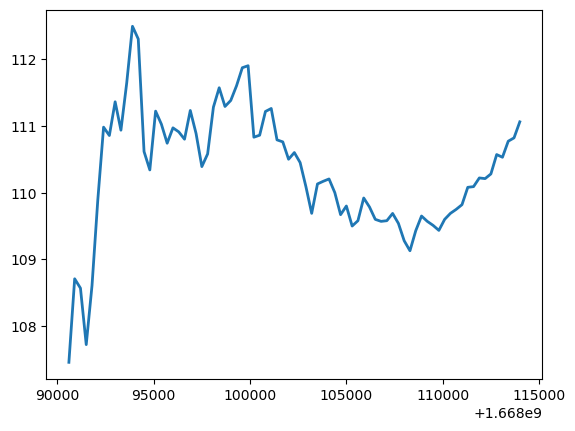

In [54]:
plt.plot(dt_list, time_series, linewidth=2)

In [53]:
dt_list

[1668090600.0,
 1668090900.0,
 1668091200.0,
 1668091500.0,
 1668091800.0,
 1668092100.0,
 1668092400.0,
 1668092700.0,
 1668093000.0,
 1668093300.0,
 1668093600.0,
 1668093900.0,
 1668094200.0,
 1668094500.0,
 1668094800.0,
 1668095100.0,
 1668095400.0,
 1668095700.0,
 1668096000.0,
 1668096300.0,
 1668096600.0,
 1668096900.0,
 1668097200.0,
 1668097500.0,
 1668097800.0,
 1668098100.0,
 1668098400.0,
 1668098700.0,
 1668099000.0,
 1668099300.0,
 1668099600.0,
 1668099900.0,
 1668100200.0,
 1668100500.0,
 1668100800.0,
 1668101100.0,
 1668101400.0,
 1668101700.0,
 1668102000.0,
 1668102300.0,
 1668102600.0,
 1668102900.0,
 1668103200.0,
 1668103500.0,
 1668103800.0,
 1668104100.0,
 1668104400.0,
 1668104700.0,
 1668105000.0,
 1668105300.0,
 1668105600.0,
 1668105900.0,
 1668106200.0,
 1668106500.0,
 1668106800.0,
 1668107100.0,
 1668107400.0,
 1668107700.0,
 1668108000.0,
 1668108300.0,
 1668108600.0,
 1668108900.0,
 1668109200.0,
 1668109500.0,
 1668109800.0,
 1668110100.0,
 166811040